# Integrals

In [6]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *
import scipy as sc
import time
import time_series.utilities.basic_utils as bu
import time_series.trend_analysis.splines as sp
import time_series.analysis.integrals as ig
import time_series.visualization.ts_plots as tp
#import Helpers.TSMethods as ht
#import Plotting.TsPlots as pp
#import Parallelization.MThreadingWorkers as mw

### Load data

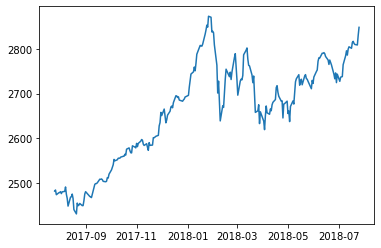

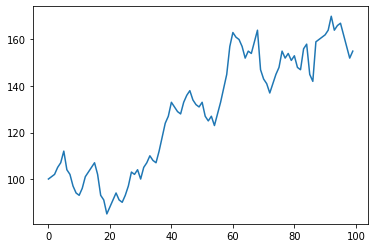

In [7]:
df = pd.read_csv(csv_path + 'sp500.csv')
date = pd.to_datetime(df.iloc[:,0].values, dayfirst=True)
price = df.iloc[:,2].values

dfToy = pd.read_csv(csv_path + 'toy/toy.csv')
ts1 = dfToy.iloc[:,1].values

plt.plot(date, price)
plt.show()
plt.plot(ts1);

### Methods

Integrals Difference

In [8]:
points = sp.GetInflectionPointIdxs(ts1)
irpe1, irpe2 = ig.TsIntegRelPointError(ts1, points)
print('irpe1 = ', '{0:.2f}'.format(irpe1))
print('irpe2 = ', '{0:.2f}'.format(irpe2))

irpe1 =  12792.33
irpe2 =  12658.72


Integrals Difference Optimization

BestIdx  :  98
BestIrpe :  12646.22
BestIdx  :  95
BestIrpe :  12641.34
BestIdx  :  93
BestIrpe :  12643.22
BestIdx  :  86
BestIrpe :  12621.88
BestIdx  :  84
BestIrpe :  12633.68
BestIdx  :  80
BestIrpe :  12632.02
BestIdx  :  79
BestIrpe :  12631.18
BestIdx  :  78
BestIrpe :  12627.68
BestIdx  :  77
BestIrpe :  12628.68
BestIdx  :  68
BestIrpe :  12622.68
BestIdx  :  66
BestIrpe :  12617.18
BestIdx  :  64
BestIrpe :  12616.28
BestIdx  :  65
BestIrpe :  12607.02
BestIdx  :  53
BestIrpe :  12604.02
BestIdx  :  52
BestIrpe :  12601.02
BestIdx  :  50
BestIrpe :  12601.02
BestIdx  :  49
BestIrpe :  12598.27
BestIdx  :  43
BestIrpe :  12581.77
BestIdx  :  46
BestIrpe :  12562.59
BestIdx  :  33
BestIrpe :  12549.09
BestIdx  :  30
BestIrpe :  12553.59
BestIdx  :  29
BestIrpe :  12551.23
BestIdx  :  28
BestIrpe :  12552.09
BestIdx  :  28
BestIrpe :  12552.09


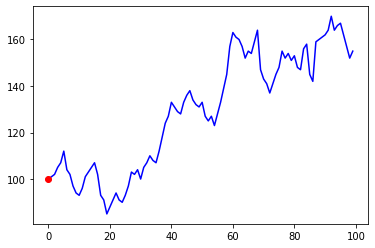

    col1  col2
0      5   112
1     10    93
2     15   107
3     19    85
4     22    94
5     24    90
6     27   103
7     35   107
8     40   133
9     54   123
10    60   163
11    72   137
12    76   155
13    82   147
14    92   170


In [12]:
points = ig.OptimIrpe(ts=ts1, decRate=0.999, trace=True)
tp.plot_high(ts1, points)
#vp.PlotTsPoints2Interp(ts1, points)

idx = np.array(np.where(points != 0)).flatten()
val = np.array(ts1[np.where(points != 0)])
df = pd.DataFrame({'col1':idx, 'col2':val})
print(df)

Integrals Difference Optimization 2

BestIdx  :  98
BestIrpe :  12646.22
BestIdx  :  95
BestIrpe :  12641.34
BestIdx  :  93
BestIrpe :  12643.22
BestIdx  :  86
BestIrpe :  12621.88
BestIdx  :  84
BestIrpe :  12633.68
BestIdx  :  80
BestIrpe :  12632.02
BestIdx  :  79
BestIrpe :  12631.18
BestIdx  :  78
BestIrpe :  12627.68
BestIdx  :  77
BestIrpe :  12628.68
BestIdx  :  68
BestIrpe :  12622.68
BestIdx  :  66
BestIrpe :  12617.18
BestIdx  :  64
BestIrpe :  12616.28
BestIdx  :  65
BestIrpe :  12607.02
BestIdx  :  53
BestIrpe :  12604.02
BestIdx  :  52
BestIrpe :  12601.02
BestIdx  :  50
BestIrpe :  12601.02
BestIdx  :  49
BestIrpe :  12598.27
BestIdx  :  43
BestIrpe :  12581.77
BestIdx  :  46
BestIrpe :  12562.59
BestIdx  :  33
BestIrpe :  12549.09
BestIdx  :  30
BestIrpe :  12553.59
BestIdx  :  29
BestIrpe :  12551.23
BestIdx  :  28
BestIrpe :  12552.09
BestIdx  :  28
BestIrpe :  12552.09


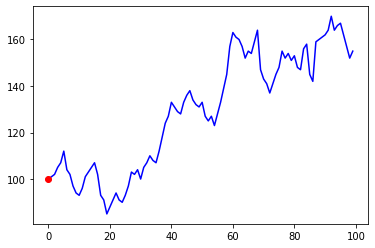

In [15]:
points = ig.OptimIrpe(ts=ts1, decRate=0.999, trace=True)
tp.plot_high(ts1, points)
#pp.PlotTsPoints2Interp(ts1, points)

Integrals Difference MultiThreading

In [ ]:
TimesSeq = []
TimesMTh = []
t1=time.time()
for n in range(20):
    for t in range(n):
        points1 = ti.OptimIrpe(ts=self.ts1, decRate=0.999, trace=False)
        #points2 = ti.OptimIrpe(ts=self.price, decRate=0.999, trace=False)
    t2=time.time()
    delta = t2-t1
    print("Sequential : ", '{0:.2f}'.format(delta))
    TimesSeq.append(delta)

#pp.PlotTsPoints2Interp(self.ts1, points1)
    #pp.PlotTsPoints2Interp(self.price, points2)

    t1=time.time()
    Jobs = []
    for t in range(n):
        Jobs.append(mw.MThOptimIrpe(ts=self.ts1, decRate=0.999, trace=False))
        #Jobs.append(mw.MThOptimIrpe(ts=self.price, decRate=0.999, trace=False))
    for i in range(len(Jobs)-1): Jobs[i].start()
    for i in range(len(Jobs)-1): Jobs[i].join()
    t2=time.time()
    delta = t2-t1
    print("Multithreading : ", '{0:.2f}'.format(delta))
    TimesMTh.append(delta)

#pp.PlotTsPoints2Interp(self.ts1, Jobs[0].output)
#pp.PlotTsPoints2Interp(self.price, Jobs[1].output)

plt.plot(TimesSeq)
plt.plot(TimesMTh)
plt.show()

Idx2BinArray